In [1]:
#import relevant libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64
import geopy

In [2]:
#Open GVA csv data set for processing
with open('Data/stage3.csv',encoding='Latin1') as f:
    df=pd.read_csv(f, delimiter=',')

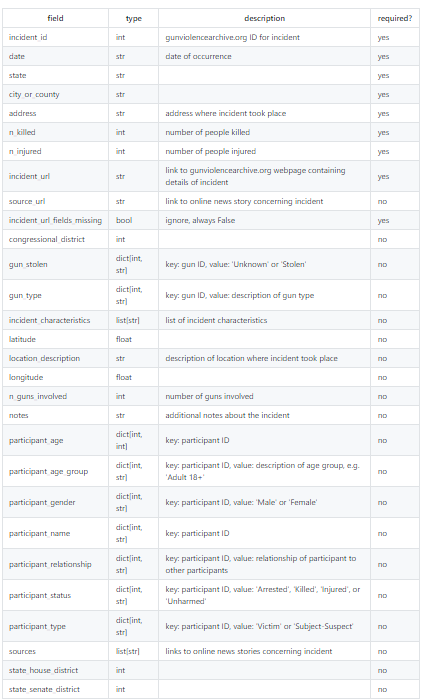

Important notes:

Each list is encoded as a string with separator ||. For example, "a||b" represents ['a', 'b'].

Each dict is encoded as a string with outer separator || and inner separator ::. For example, 0::a, 1::b represents {0: 'a', 1: 'b'}.

The "gun ID" and "participant ID" are numbers specific to a given incident that refer to a particular gun/person involved in that incident. For example, this:

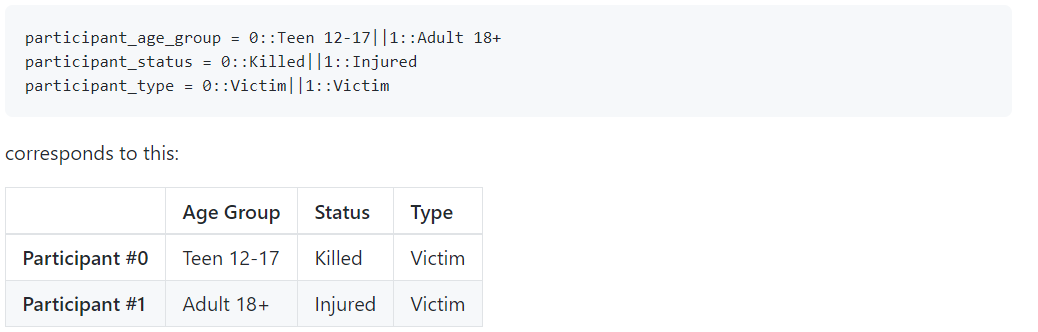

In [3]:
#look at column names
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [4]:
#get a sense of how the data set looks
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [5]:
# create a copy for manipulation
df_original = df.copy()

<AxesSubplot:title={'center':'Number of people killed'}, ylabel='Frequency'>

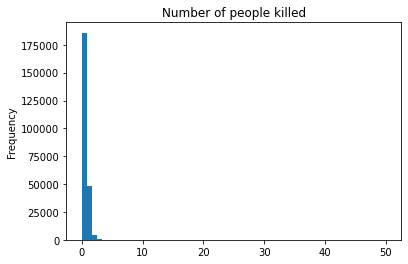

In [6]:
#make histogram to look at distribution fo people killed
df['n_killed'].plot.hist(title='Number of people killed',bins=60)

In [7]:
#look at the frequency of people killed
killed = df.groupby(df['n_killed']).size()
killed

n_killed
0     185835
1      48436
2       4604
3        595
4        139
5         41
6         11
7          2
8          5
9          3
10         1
11         1
16         1
17         1
27         1
50         1
dtype: int64

In [8]:
#look at the frequency of people injure
injured = df.groupby(df['n_injured']).size()
injured

n_injured
0     142487
1      81986
2      11484
3       2513
4        760
5        241
6         91
7         51
8         19
9         12
10         6
11         4
12         5
13         2
14         3
15         2
16         2
17         2
18         1
19         3
20         1
25         1
53         1
dtype: int64

In [9]:
#look at stats summary of people killed
df['n_killed'].describe()

count    239677.000000
mean          0.252290
std           0.521779
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          50.000000
Name: n_killed, dtype: float64

In [10]:
#trial and error until we find a quantile that has 1 kill
df['n_killed'].quantile(0.95)

1.0

In [11]:
#injured stats summary
df['n_injured'].describe()

count    239677.000000
mean          0.494007
std           0.729952
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          53.000000
Name: n_injured, dtype: float64

In [12]:
#look quantile where there are two people injured
df['n_injured'].quantile(0.95)

2.0

<AxesSubplot:title={'center':'Number of people injured'}, ylabel='Frequency'>

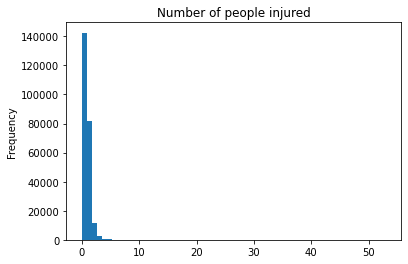

In [13]:
#histogram of people injured
df['n_injured'].plot.hist(title='Number of people injured', bins = 60)

In [14]:
#drop NaN values from coordinates
df_nonan = df.dropna(axis =0, subset = ['latitude','longitude'])
df_nonan = df_nonan.reset_index(drop = True)




In [15]:
#look at dataframe withouth NaN values
df_nonan

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231749,1082061,2018-03-31,Washington,Spokane (Spokane Valley),12600 block of N Willow Crest Ln,0,0,http://www.gunviolencearchive.org/incident/108...,https://www.kxly.com/news/domestic-violence-su...,False,...,0::48,0::Adult 18+,0::Male,0::Sean M. Gummow,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,https://www.kxly.com/news/domestic-violence-su...,4.0,4.0
231750,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0
231751,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0
231752,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108.

In [16]:
# df_nonan[['latitude','longitude']].sort_values(by = ['latitude','longitude'])

In [17]:
# df_nonan.index

In [18]:
#create a zipcode column
# def get_zipcode(df,geolocator, lat_field, long_field):
#     try:
#         location = geolocator.reverse((df[lat_field],df[long_field]))

#         return location.raw['address']['postcode']
#     except(AttributeError,KeyError, ValueError):
#         print(df[lat_field], df[long_field])
#         return None

# geolocator = geopy.Nominatim(user_agent ='pacoramirez2010@hotmail.com')

# zipcodes = df_nonan.apply(get_zipcode, axis=1, geolocator = geolocator, lat_field ='latitude', long_field = 'longitude')

#make a function that looks for zipcodes
# print(zipcodes)
from uszipcode import SearchEngine
from uszipcode import Zipcode
search = SearchEngine(simple_zipcode = True)

def get_zipcode(lat,lon):
    try:
        result = search.by_coordinates(lat = lat, lng = lon, returns = 1)
        return result[0].zipcode
    except IndexError:
        return None


In [19]:
#  get_zipcode(df_nonan, geolocator, df_nonan.iloc[0]['latitude'],df_nonan.iloc[0]['longitude'])

In [20]:
#test function on a coordinate
get_zipcode(df_nonan.iloc[0]['latitude'],df_nonan.iloc[0]['longitude'])

'15132'

In [21]:
#check latitude datatype
df_nonan.loc[387]['latitude'].dtype

dtype('float64')

In [22]:
#run a longer test on the function to catch any errors
zipcodes = []
for x in range(0,388):
    a = get_zipcode(df_nonan.iloc[x]['latitude'], df_nonan.iloc[x]['longitude'])
    zipcodes.append(a)
    
zipcodes 

['15132',
 '90249',
 '44055',
 '80013',
 '27409',
 '74130',
 '87105',
 '70113',
 '94531',
 '21223',
 '37404',
 '63120',
 '70544',
 '20002',
 '45502',
 '38115',
 '95993',
 '60649',
 '70139',
 '94590',
 '19801',
 '84047',
 '92840',
 '74115',
 '49503',
 '93534',
 '31206',
 '71108',
 '31768',
 '48601',
 '93620',
 '46219',
 '39204',
 '64137',
 '20001',
 '92057',
 '13350',
 '95351',
 '95632',
 '95205',
 '33476',
 '60620',
 '64112',
 '11224',
 '95301',
 '98002',
 '29649',
 '10470',
 '90805',
 '19133',
 '94589',
 '85029',
 '40505',
 '44310',
 '98003',
 '60621',
 '70058',
 '62082',
 '44074',
 '32686',
 '28215',
 '19094',
 '38301',
 '21218',
 '07108',
 '27577',
 '94303',
 '15901',
 '90501',
 '47232',
 '19138',
 '07302',
 '85119',
 '70116',
 '45232',
 '08075',
 '48204',
 '19142',
 '11436',
 '23974',
 '38132',
 '48201',
 '60651',
 '37881',
 '93305',
 '48502',
 '23661',
 '38114',
 '60602',
 '30314',
 '53206',
 '94589',
 '46205',
 '23452',
 '30241',
 '90404',
 '17401',
 '63113',
 '60621',
 '27260',


In [23]:

# df_nonan

#https://stackoverflow.com/questions/59121678/reverse-geocoding-for-pandas-dataframe

In [24]:
# zipcodes = []
# for row in df_nonan['Index']:
#     a= get_zipcode(df_nonan[df_nonan['Index']== row]['latitude'],df_nonan[df_nonan['Index']== row]['longitude'])
#     zipcodes.append(a)
    
# zipcodes

In [25]:
#apply the zipcode function the the whole dataframe and create a new column for zipcodes
df_nonan['zipcode'] = df_nonan.apply(lambda x: get_zipcode(x['latitude'],x['longitude']), axis =1)
df_nonan

KeyboardInterrupt: 

In [ ]:
#give that this is an intense process, the produces dataframe will be saved for further manipulation
df_nonan.to_csv(r'C:\Users\emili\Documents\DS4A\Capstone_Project\Guns\Team97_DS4A\Data\zipcode_nonan.csv')

In [26]:
#open dataframe just created
with open('Data/zipcode_nonan.csv',encoding='Latin1') as f:
    df2=pd.read_csv(f, delimiter=',')

In [27]:
#generate dataframe
df2

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,zipcode
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,15132.0
1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,90249.0
2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,44055.0
3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,80013.0
4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,27409.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231749,231749,1082061,2018-03-31,Washington,Spokane (Spokane Valley),12600 block of N Willow Crest Ln,0,0,http://www.gunviolencearchive.org/incident/108...,https://www.kxly.com/news/domestic-violence-su...,...,0::Adult 18+,0::Male,0::Sean M. Gummow,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,https://www.kxly.com/news/domestic-violence-su...,4.0,4.0,99216.0
231750,231750,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,...,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0,71457.0
231751,231751,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,...,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0,70114.0
231752,231752,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.chron.com/news/houston-texas/houst...,...,0::Adult 18+,0::Male,0::Leroy El

In [28]:
#check for zipcode type
df2['zipcode'].dtypes

dtype('float64')

In [29]:
#drop NaN values for zipcodes
df2 = df2.dropna(axis =0, subset = ['zipcode'])
df2 = df2.reset_index(drop = True)
df2['zipcode'] = df2['zipcode'].astype(int)
df2
# df2.sort_values(by=['zipcode'], ascending =False)


,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,zipcode
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,15132
1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,90249
2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,44055
3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,80013
4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,27409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231476,231749,1082061,2018-03-31,Washington,Spokane (Spokane Valley),12600 block of N Willow Crest Ln,0,0,http://www.gunviolencearchive.org/incident/108...,https://www.kxly.com/news/domestic-violence-su...,...,0::Adult 18+,0::Male,0::Sean M. Gummow,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,https://www.kxly.com/news/domestic-violence-su...,4.0,4.0,99216
231477,231750,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,...,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0,71457
231478,231751,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,...,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0,70114
231479,231752,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.chron.com/news/houston-texas/houst...,...,0::Adult 18+,0::Male,0::Leroy Ellis,NaN,0::Kille

In [30]:
#This is the zipcodes associated with incident IDs
zipcodes_df = df2[['incident_id','zipcode']]

In [31]:
#look at zipcodes with incident ID
zipcodes_df

,incident_id,zipcode
0,461105,15132
1,460726,90249
2,478855,44055
3,478925,80013
4,478959,27409
...,...,...
231476,1082061,99216
231477,1083139,71457
231478,1083151,70114
231479,1082514,77082


In [32]:
#Open GVA dataset with gender  data
with open('Data/CLEAN.csv',encoding='Latin1') as f:
    df=pd.read_csv(f, delimiter=',')

C:\Users\emili\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [33]:
# make a copy dataframe
clean_df = df

In [34]:
#look at content of data frame
clean_df.head()

,incident_id,age,type,gender,status,date,state
0,461105,20.0,Victim,Male,Arrested,1/1/2013,Pennsylvania
1,460726,20.0,Victim,Male,Killed,1/1/2013,California
2,478855,25.0,Subject-Suspect,Male,"Injured, Unharmed, Arrested",1/1/2013,Ohio
3,478925,29.0,Victim,Female,Killed,1/5/2013,Colorado
4,478959,18.0,Victim,Female,Injured,1/7/2013,North Carolina


In [35]:
#look at data types
clean_df.dtypes

incident_id      int64
age            float64
type            object
gender          object
status          object
date            object
state           object
dtype: object

In [36]:
#look at the date ranges
df['date'].sort_values()

0         1/1/2013
1         1/1/2013
2         1/1/2013
357       1/1/2014
356       1/1/2014
            ...   
413658         NaN
413659         NaN
413660         NaN
413661         NaN
413662         NaN
Name: date, Length: 413663, dtype: object

In [37]:
#create a column for date in datetime and year
clean_df['date'] = pd.to_datetime(clean_df['date'],format ='%m/%d/%Y')
clean_df['Year'] = pd.DatetimeIndex(clean_df['date']).year
clean_df['Year'].sort_values()

0         2013.0
176       2013.0
177       2013.0
178       2013.0
179       2013.0
           ...  
413658       NaN
413659       NaN
413660       NaN
413661       NaN
413662       NaN
Name: Year, Length: 413663, dtype: float64

In [38]:
#drop NaN values and convert values for Year and State to integers and strigns respectively
clean_nonan = clean_df.dropna(axis =0, subset = ['Year','state'])
clean_nonan = clean_nonan.reset_index(drop = True)
clean_nonan['Year'] = clean_nonan['Year'].astype(int)
clean_nonan['state'] = clean_nonan['state'].astype(str)

In [39]:
#look at data set again
clean_nonan.head()

,incident_id,age,type,gender,status,date,state,Year
0,461105,20.0,Victim,Male,Arrested,2013-01-01,Pennsylvania,2013
1,460726,20.0,Victim,Male,Killed,2013-01-01,California,2013
2,478855,25.0,Subject-Suspect,Male,"Injured, Unharmed, Arrested",2013-01-01,Ohio,2013
3,478925,29.0,Victim,Female,Killed,2013-01-05,Colorado,2013
4,478959,18.0,Victim,Female,Injured,2013-01-07,North Carolina,2013


In [40]:
#clean_nonan.dtypes

In [41]:
#Open ACS Census Data set to get population info
with open('Data/ACS_2013-2019_Cleaning.csv',encoding='Latin1') as f:
    df=pd.read_csv(f, delimiter=',')

In [42]:
#rename census columns
census_state_df = df
census_state_df = census_state_df.rename(columns ={"Geographic Area Name":"state","Estimate!!SEX AND AGE!!Total population":"Total Population","Estimate!!SEX AND AGE!!Total population!!Male":"Male Population","Percent!!SEX AND AGE!!Total population!!Male":"Percent Male Population","Estimate!!SEX AND AGE!!Total population!!Female":"Female Population","Percent!!SEX AND AGE!!Total population!!Female":"Percent Female Population"})
census_state_df.head()

,id,Year,state,Total Population,Male Population,Percent Male Population,Female Population,Percent Female Population
0,1,2019,Alabama,4903185,2369611,48.3,2533574,51.7
1,2,2019,Alaska,731545,380433,52.0,351112,48.0
2,3,2019,Arizona,7278717,3620935,49.7,3657782,50.3
3,4,2019,Arkansas,3017804,1474705,48.9,1543099,51.1
4,5,2019,California,39512223,19640794,49.7,19871429,50.3


In [43]:
#look at data types
census_state_df.dtypes

id                             int64
Year                           int64
state                         object
Total Population               int64
Male Population                int64
Percent Male Population      float64
Female Population              int64
Percent Female Population    float64
dtype: object

In [44]:
#look at the different states
census_state_df['state'].sort_values()

0      Alabama
312    Alabama
52     Alabama
208    Alabama
156    Alabama
        ...   
258    Wyoming
310    Wyoming
102    Wyoming
362    Wyoming
154    Wyoming
Name: state, Length: 364, dtype: object

In [45]:
#merge census with GVA dataset 
merged_df = pd.merge(clean_nonan,
                     census_state_df[['Year','state','Total Population','Male Population',
                                      'Percent Male Population','Female Population','Percent Female Population']], 
                     on =['state','Year'])

In [46]:
#look at merged dataset
merged_df

,incident_id,age,type,gender,status,date,state,Year,Total Population,Male Population,Percent Male Population,Female Population,Percent Female Population
0,461105,20.0,Victim,Male,Arrested,2013-01-01,Pennsylvania,2013,12731381,6211805,48.8,6519576,51.2
1,484268,21.0,Victim,Female,Killed,2013-04-09,Pennsylvania,2013,12731381,6211805,48.8,6519576,51.2
2,485885,17.0,Victim,Male,Killed,2013-04-28,Pennsylvania,2013,12731381,6211805,48.8,6519576,51.2
3,486068,NaN,Victim,Male,Injured,2013-05-06,Pennsylvania,2013,12731381,6211805,48.8,6519576,51.2
4,486121,15.0,Victim,Male,Injured,2013-05-11,Pennsylvania,2013,12731381,6211805,48.8,6519576,51.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1073419,49.0,Victim,Male,Killed,2018-03-18,Wyoming,2018,581836,296979,51.0,284857,49.0
239673,1076613,NaN,Subject-Suspect,Male,Killed,2018-03-19,Wyoming,2018,581836,296979,51.0,284857,49.0
239674,1074675,20.0,Subject-Suspect,Male,"Unharmed, Arrested",2018-03-21,Wyoming,2018,581836,296979,51.0,284857,49.0
239675,1076607,86.0,Subject-Suspect,Male,Killed,2018-03-22,Wyoming,2018,581836,296979,51.0,284857,49.0


In [47]:
#weight the population of states by each individual states population
merged_df ['total_population_weighted_by_state'] = merged_df.apply(lambda x: 100000/x['Total Population'], axis = 1) 

In [48]:
#look at merged dataset
merged_df.head(10)

,incident_id,age,type,gender,status,date,state,Year,Total Population,Male Population,Percent Male Population,Female Population,Percent Female Population,total_population_weighted_by_state
0,461105,20.0,Victim,Male,Arrested,2013-01-01,Pennsylvania,2013,12731381,6211805,48.8,6519576,51.2,0.007855
1,484268,21.0,Victim,Female,Killed,2013-04-09,Pennsylvania,2013,12731381,6211805,48.8,6519576,51.2,0.007855
2,485885,17.0,Victim,Male,Killed,2013-04-28,Pennsylvania,2013,12731381,6211805,48.8,6519576,51.2,0.007855
3,486068,NaN,Victim,Male,Injured,2013-05-06,Pennsylvania,2013,12731381,6211805,48.8,6519576,51.2,0.007855
4,486121,15.0,Victim,Male,Injured,2013-05-11,Pennsylvania,2013,12731381,6211805,48.8,6519576,51.2,0.007855
5,486334,41.0,Victim,Male,Injured,2013-05-16,Pennsylvania,2013,12731381,6211805,48.8,6519576,51.2,0.007855
6,487645,NaN,Victim,Male,Injured,2013-06-09,Pennsylvania,2013,12731381,6211805,48.8,6519576,51.2,0.007855
7,964573,30.0,Victim,Male,Killed,2013-08-05,Pennsylvania,2013,12731381,6211805,48.8,6519576,51.2,0.007855
8,491609,62.0,Victim,Male,Killed,2013-08-06,Pennsylvania,2013,12731381,6211805,48.8,6519576,51.2,0.007855
9,491770,NaN,Victim,Male,Injured,2013-08-13,Pennsylvania,2013,12731381,6211805,48.8,6519576,51.2,0.007855


In [49]:
#look at states
merged_df.sort_values(by = ['state'])

,incident_id,age,type,gender,status,date,state,Year,Total Population,Male Population,Percent Male Population,Female Population,Percent Female Population,total_population_weighted_by_state
133100,680172,NaN,Victim,NaN,Injured,2016-10-19,Alabama,2016,4841164,2346193,48.5,2494971,51.5,0.020656
55895,384846,44.0,Victim,Male,Killed,2015-07-24,Alabama,2015,4830620,2341093,48.5,2489527,51.5,0.020701
55894,380328,NaN,Victim,Male,Injured,2015-07-23,Alabama,2015,4830620,2341093,48.5,2489527,51.5,0.020701
55893,384863,41.0,Subject-Suspect,Male,"Unharmed, Arrested",2015-07-23,Alabama,2015,4830620,2341093,48.5,2489527,51.5,0.020701
55892,389282,29.0,Victim,Male,Injured,2015-07-23,Alabama,2015,4830620,2341093,48.5,2489527,51.5,0.020701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103004,379774,NaN,NaN,NaN,NaN,2015-07-15,Wyoming,2015,579679,295561,51.0,284118,49.0,0.172509
103005,379775,NaN,NaN,NaN,NaN,2015-07-16,Wyoming,2015,579679,295561,51.0,284118,49.0,0.172509
103006,378184,23.0,Subject-Suspect,Male,Killed,2015-07-16,Wyoming,2015,579679,295561,51.0,284118,49.0,0.172509
102942,309256,NaN,NaN,NaN,NaN,2015-03-17,Wyoming,2015,579679,295561,51.0,284118,49.0,0.172509


In [50]:
# group by states and years to look at how the data frame looks like
states_total_incidents=merged_df.groupby(['state','Year']).size()
states_total_incidents_df=pd.DataFrame(states_total_incidents)
states_total_incidents_df.rename(columns = {0:"Incidents"},inplace =True)
states_total_incidents_df.head(50)

Incidents
state                Year           
Alabama              2013          2
                     2014       1318
                     2015       1034
                     2016       1309
                     2017       1461
                     2018        347
Alaska               2014        146
                     2015        380
                     2016        445
                     2017        317
                     2018         61
Arizona              2013          5
                     2014        556
                     2015        480
                     2016        554
                     2017        587
                     2018        146
Arkansas             2014        572
                     2015        538
                     2016        720
                     2017        820
                     2018        192
California           2013         39
                     2014       3732
                     2015       3234
                     2016       3617
                     2017       4588
                     2018       1096
Colorado             2013          3
                     2014        556
                     2015        788
                     2016        812
                     2017        809
                     2018        233
Connecticut          2013          3
                     2014        583
                     2015        737
                     2016        803
                     2017        780
                     2018        161
Delaware             2013          3
                     2014        493
                     2015        366
                     2016        328
                     2017        389
                     2018        106
District of Columbia 2013          6
                     2014        838
                     2015        538
                     2016        497

In [53]:
#add an extra column of population weighted by year
states_total_incidents_weighted = merged_df.groupby(['state','Year'])['total_population_weighted_by_state'].sum()
states_total_incidents_weighted_df = pd.DataFrame(states_total_incidents_weighted)
states_total_incidents_weighted_df.rename(columns = {0:"Total Incidents In State per 100k"}, inplace = True)
states_total_incidents_weighted_df.head(10)

total_population_weighted_by_state
state   Year                                    
Alabama 2013                            0.041673
        2014                           27.357578
        2015                           21.405120
        2016                           27.038952
        2017                           30.118923
        2018                            7.133049
Alaska  2014                           20.046684
        2015                           51.815238
        2016                           60.391800
        2017                           42.921070

In [55]:
#reindex the dataframe
states_weighted_Year_reindexed_df= states_total_incidents_weighted_df.reset_index(level ='Year')

In [56]:
#make a pivot table that includes the weighted incidents
pivoted_total_incident_weighted_df = pd.pivot_table(data = states_weighted_Year_reindexed_df, index ="state", columns ='Year', values = 'total_population_weighted_by_state' )
pivoted_total_incident_weighted_df

Year,2013,2014,2015,2016,2017,2018
state,,,,,,
Alabama,0.041673,27.357578,21.405120,27.038952,30.118923,7.133049
Alaska,NaN,20.046684,51.815238,60.391800,42.921070,8.259808
Arizona,0.077164,8.473652,7.226817,8.233539,8.619745,2.101722
Arkansas,NaN,19.409332,18.186686,24.254903,27.535776,6.419964
California,0.103560,9.803788,8.417170,9.357326,11.769279,2.799578
Colorado,0.058601,10.697286,14.927335,15.151247,14.880846,4.212512
Connecticut,0.083716,16.230273,20.510840,22.376601,21.699952,4.495318
Delaware,0.330234,53.758751,39.505469,35.091661,41.219329,11.163829
District of Columbia,0.968725,132.231718,83.090856,75.416269,169.841655,25.420089


In [58]:
#drop the outlier states 2013 and 2018
t_years = pivoted_total_incident_weighted_df.drop([2013,2018], axis = 1)
t_years

Year,2014,2015,2016,2017
state,,,,
Alabama,27.357578,21.405120,27.038952,30.118923
Alaska,20.046684,51.815238,60.391800,42.921070
Arizona,8.473652,7.226817,8.233539,8.619745
Arkansas,19.409332,18.186686,24.254903,27.535776
California,9.803788,8.417170,9.357326,11.769279
Colorado,10.697286,14.927335,15.151247,14.880846
Connecticut,16.230273,20.510840,22.376601,21.699952
Delaware,53.758751,39.505469,35.091661,41.219329
District of Columbia,132.231718,83.090856,75.416269,169.841655


Text(0.5, 1.0, 'Total Gun Related Incidents per 100,000 from 2013-2018')

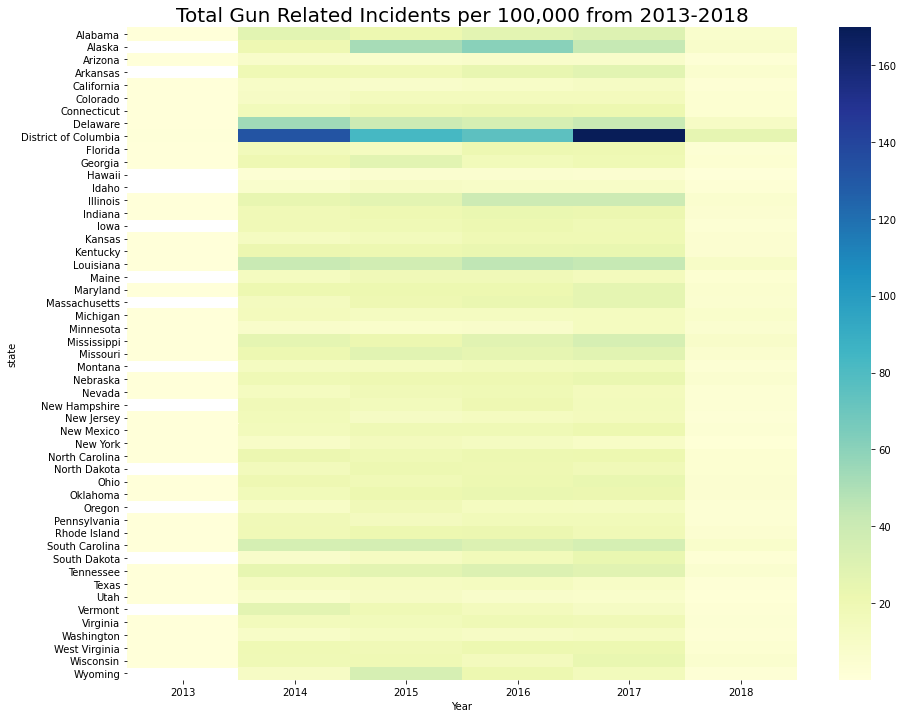

In [59]:
#visualize a heat map of the dataset with the outliers
plt.figure(figsize=(15, 12)) # We can set the size using matplotlib
sns.heatmap(pivoted_total_incident_weighted_df, cmap="YlGnBu") # cmap defines the color palette
plt.title("Total Gun Related Incidents per 100,000 from 2013-2018", fontsize  = 20)

Text(0.5, 1.0, 'Total Gun Related Incidents per 100,000 from 2014-2017')

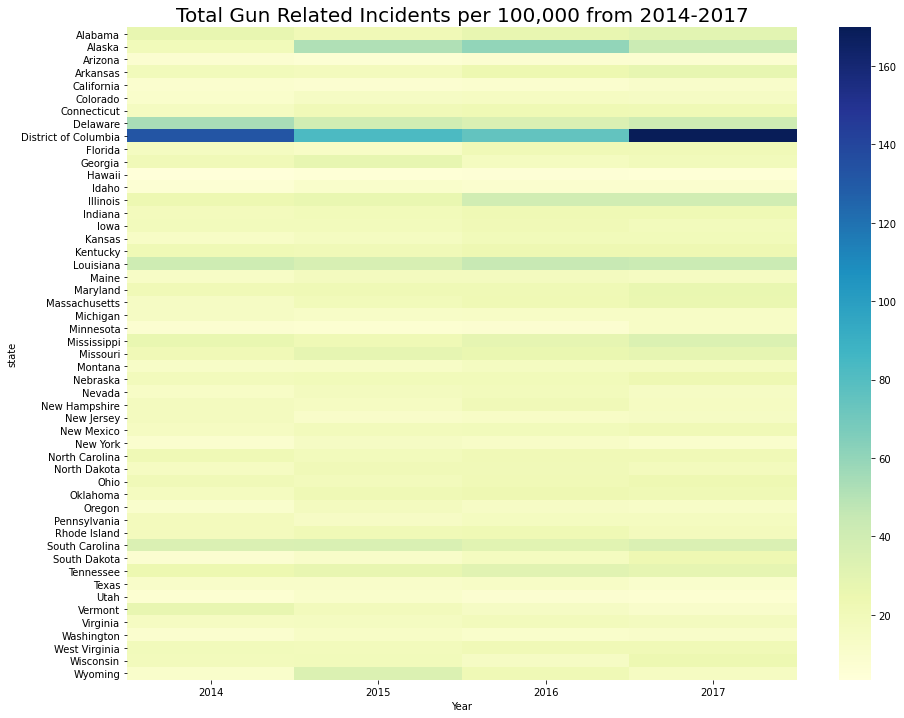

In [60]:
#create a heat map without the outlier years
plt.figure(figsize=(15, 12)) # We can set the size using matplotlib
sns.heatmap(t_years, cmap="YlGnBu") # cmap defines the color palette
plt.title("Total Gun Related Incidents per 100,000 from 2014-2017", fontsize  = 20)